In [1]:
!pip install ucimlrepo

# Loading Dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from ucimlrepo import fetch_ucirepo

# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)


# Combine features and targets into one DataFrame
training_df = pd.concat(
    [breast_cancer_wisconsin_diagnostic.data.features,
     breast_cancer_wisconsin_diagnostic.data.targets],
    axis=1
)
target_col =  training_df.columns[-1]
# Display first 10 rows
print(training_df.head(10))


   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   
5    12.45     15.70       82.57   477.1      0.12780       0.17000   
6    18.25     19.98      119.60  1040.0      0.09463       0.10900   
7    13.71     20.83       90.20   577.9      0.11890       0.16450   
8    13.00     21.82       87.50   519.8      0.12730       0.19320   
9    12.46     24.04       83.97   475.9      0.11860       0.23960   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0     0.30010          0.14710     0.2419             0.07871  ...     17.33   
1     0.08690          0.07017     0.1812             0.05

In [3]:
target_col

'Diagnosis'

# EDA

Shape: (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    floa

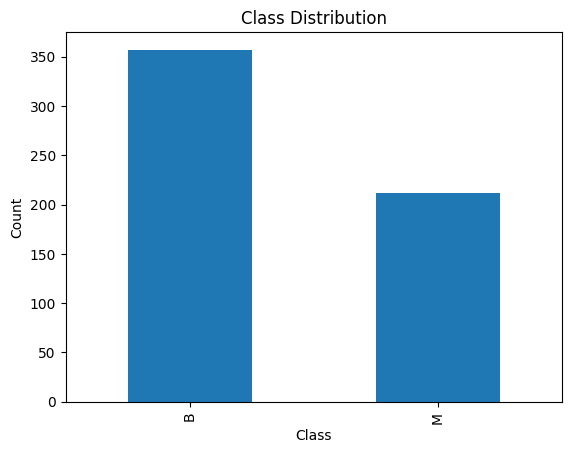

In [4]:
import matplotlib.pyplot as plt
# Shape of dataset
print("Shape:", training_df.shape)

# Data types and non-null info
print(training_df.info())

# Summary statistics
training_df.describe(include='all')

training_df[target_col].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [5]:
# Missing values
training_df.isnull().sum()


,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


In [6]:
import seaborn as sns
# Numerical features
num_features = training_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features = [col for col in num_features if col != target_col]

# Categorical features
cat_features = training_df.select_dtypes(include=['object', 'category']).columns.tolist()



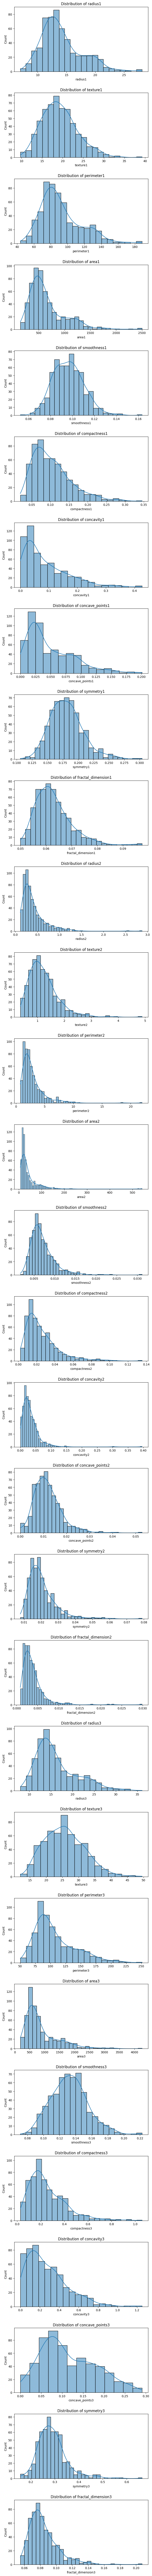

In [7]:

from scipy.stats import shapiro

fig, axes = plt.subplots(nrows=len(num_features), ncols=1, figsize=(8, len(num_features)*4))
fig.tight_layout(pad=5.0)
features = {}
for i, column in enumerate(num_features):
    # Plot histogram with KDE
    sns.histplot(training_df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

    # Shapiro-Wilk normality test
    stat, p = shapiro(training_df[column].dropna())

    # Add test result as text on plot
    result = 1 if p > 0.05 else 0
    features[column]=result

plt.show()


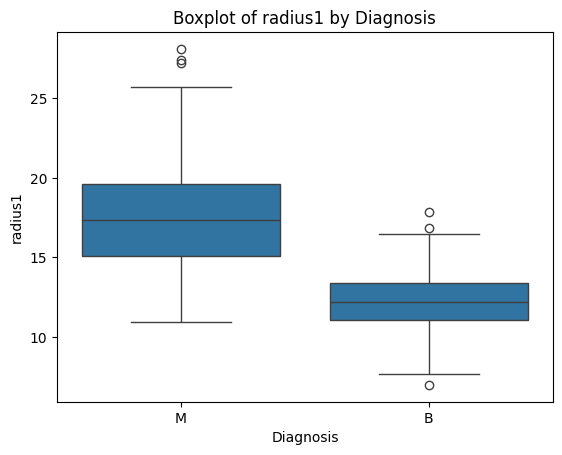

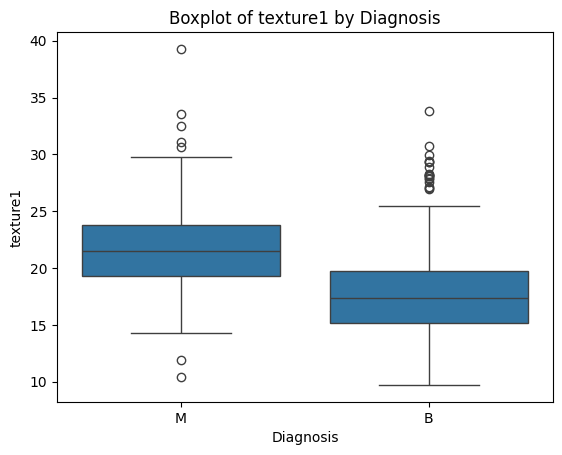

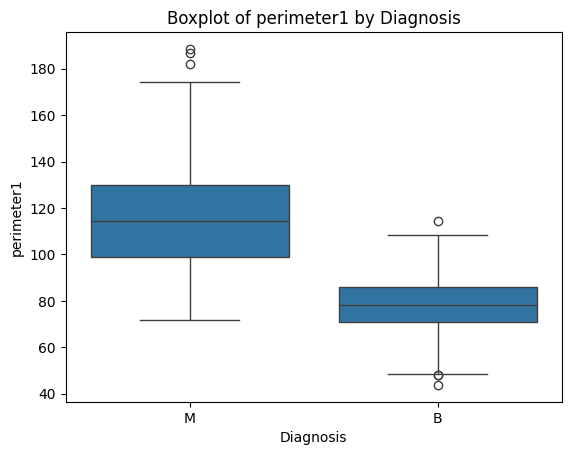

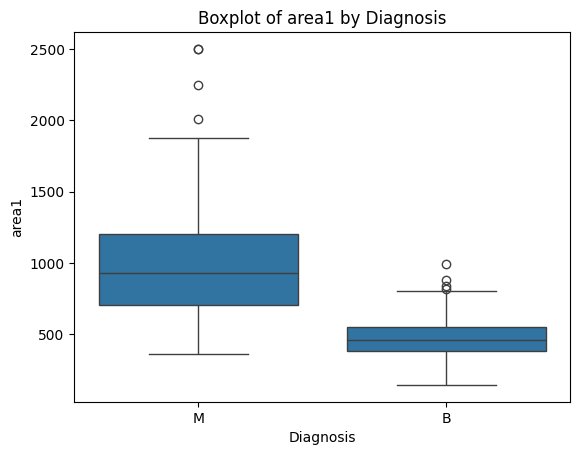

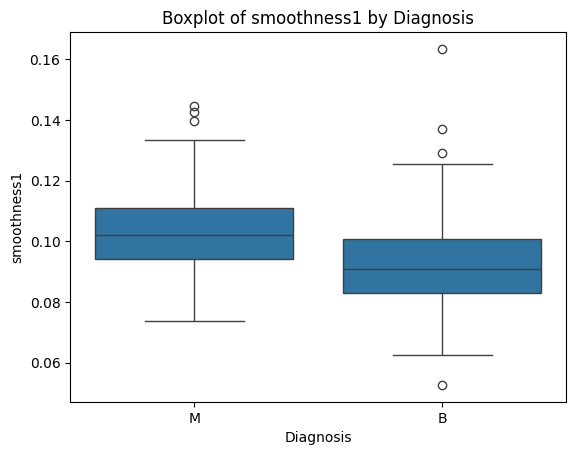

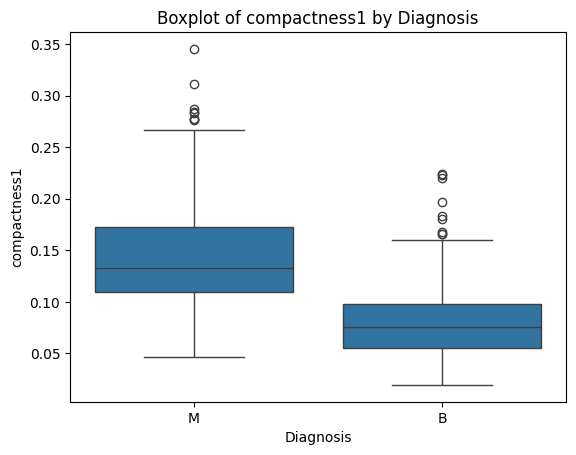

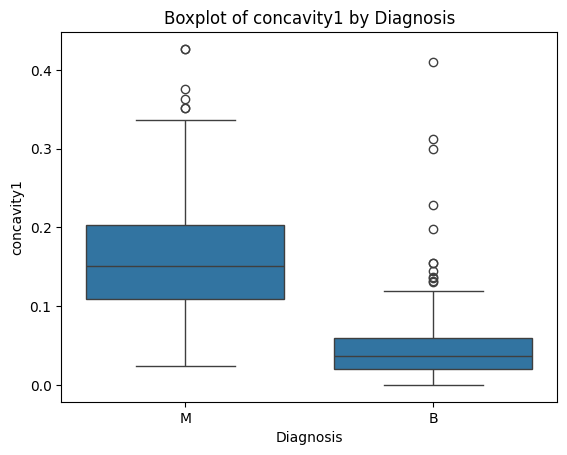

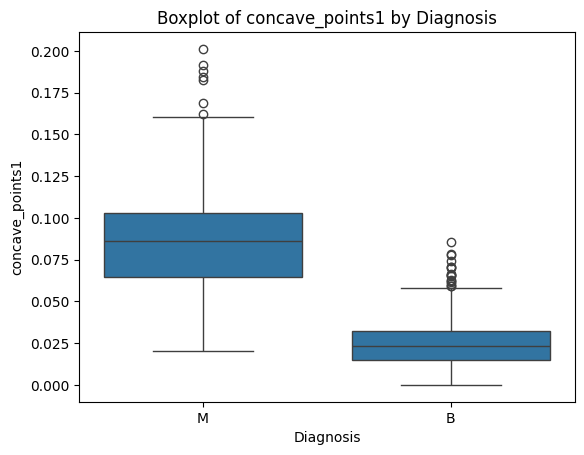

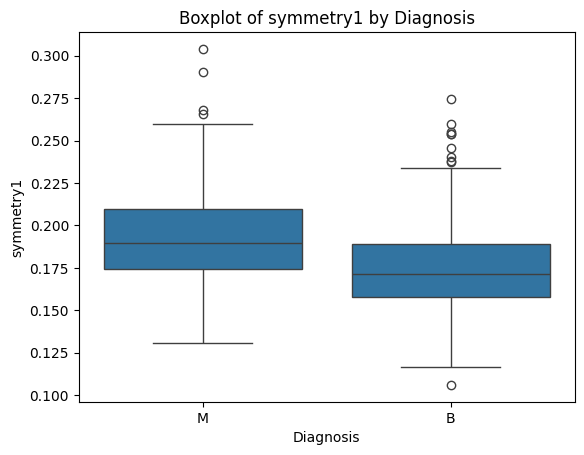

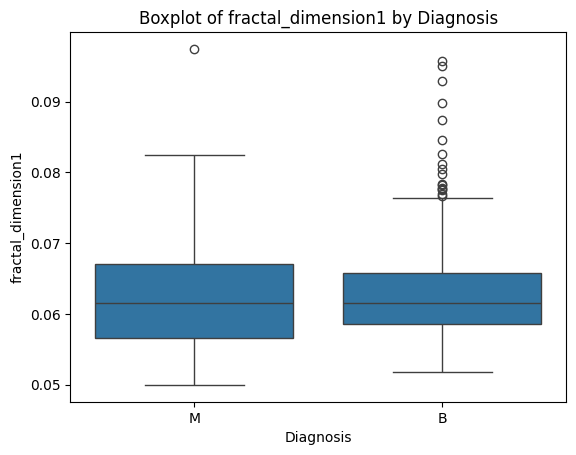

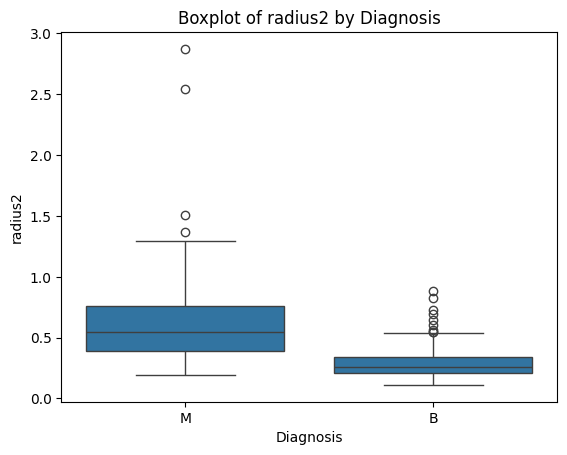

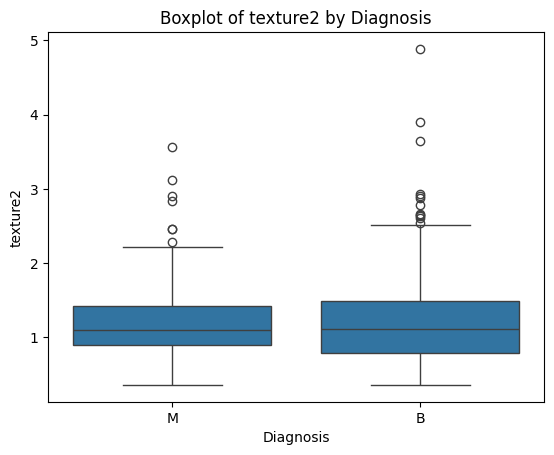

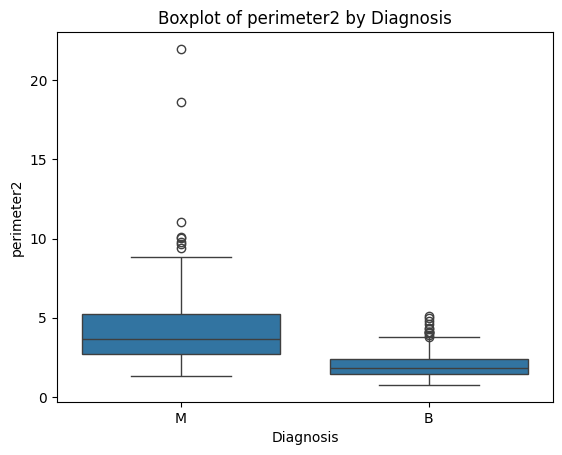

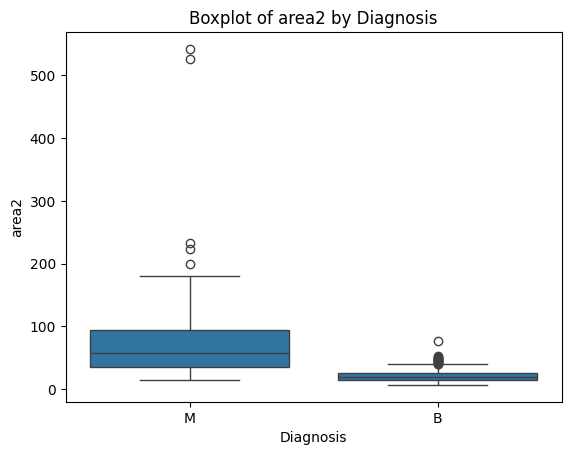

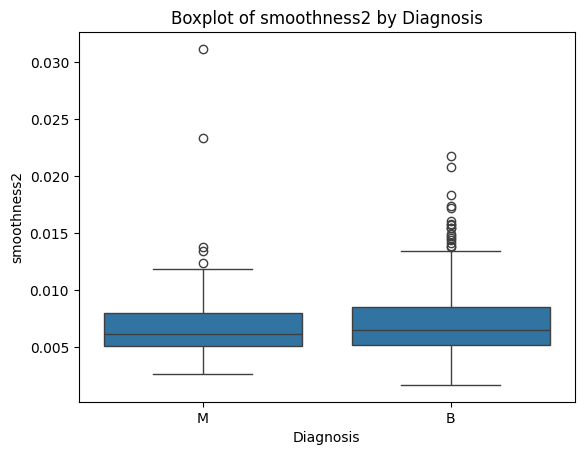

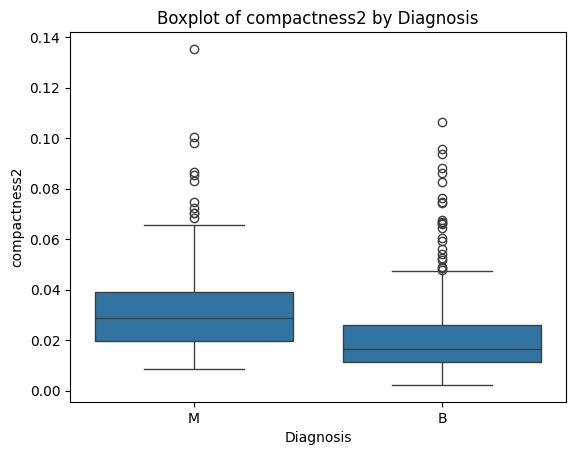

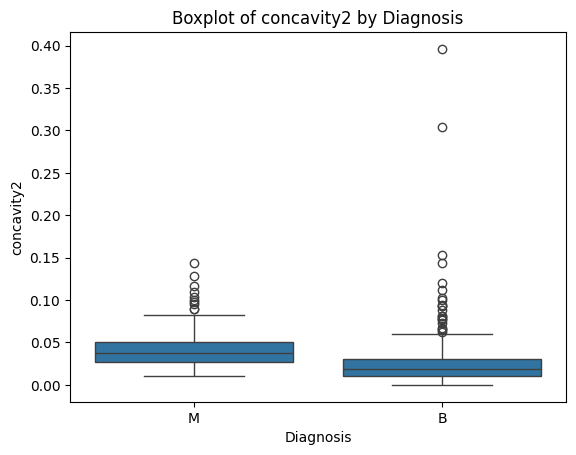

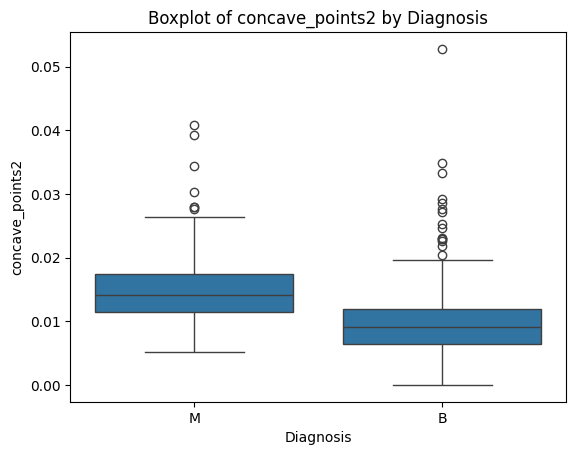

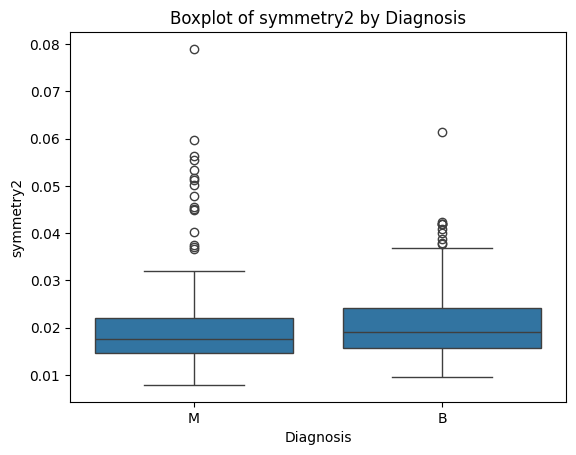

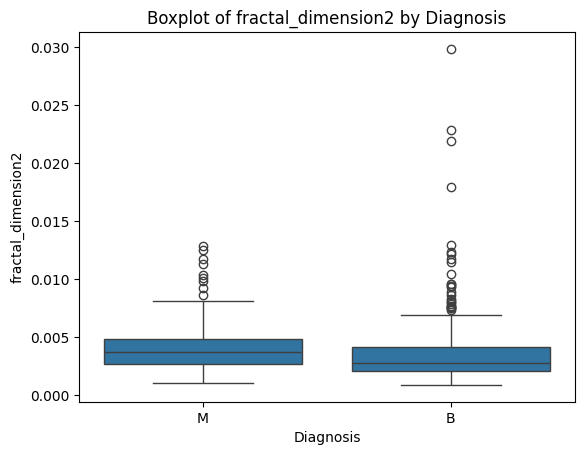

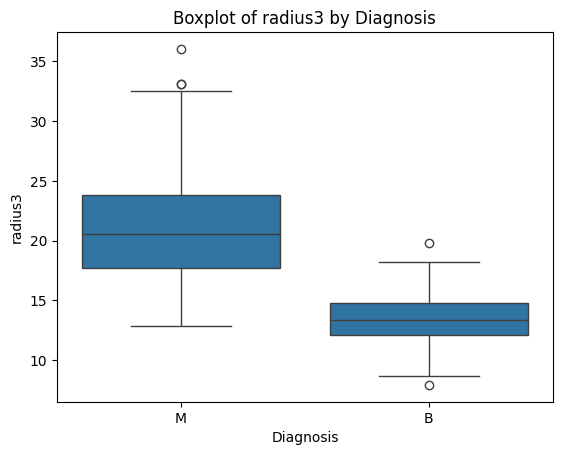

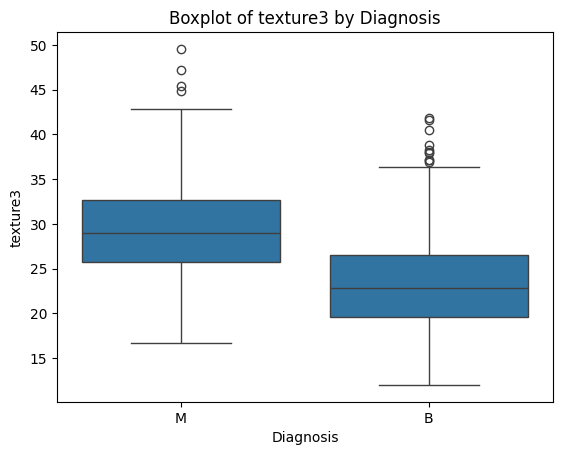

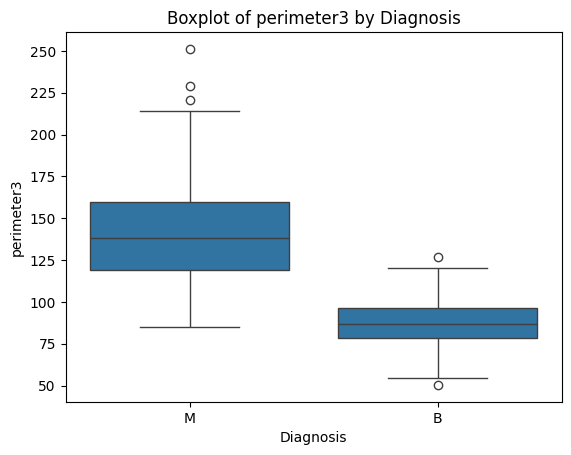

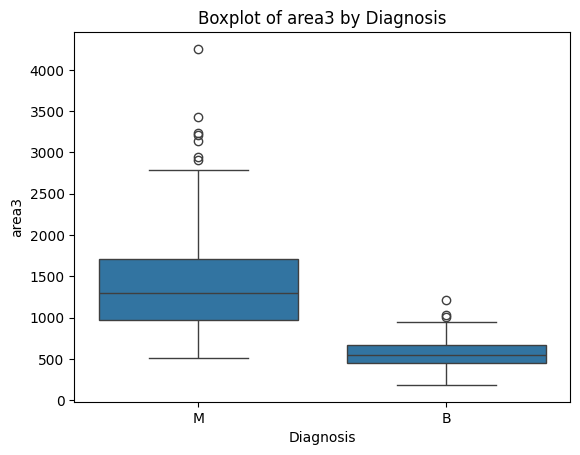

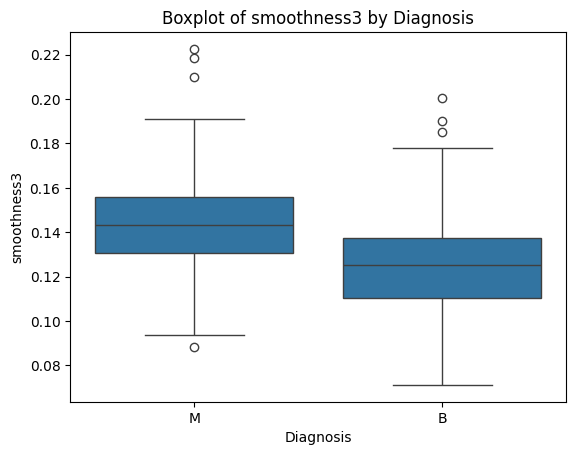

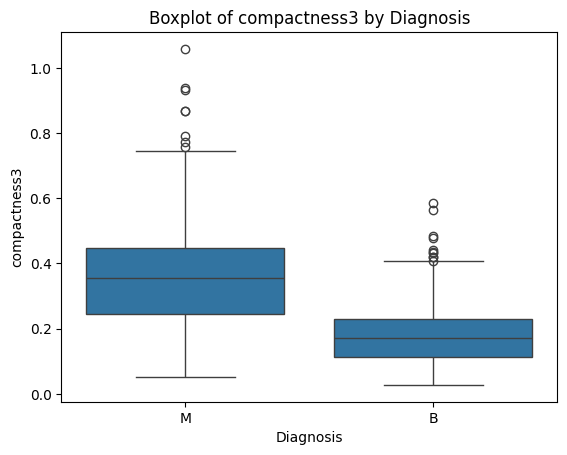

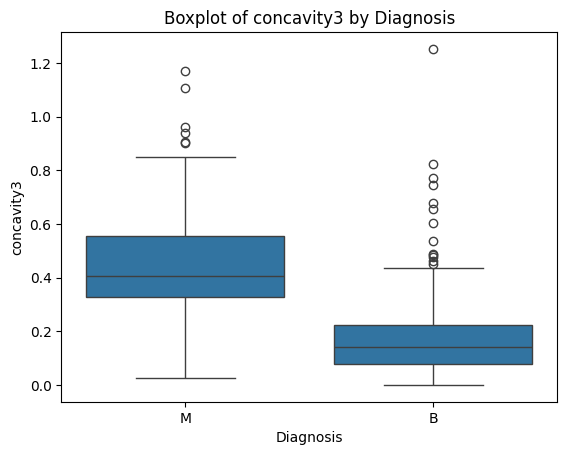

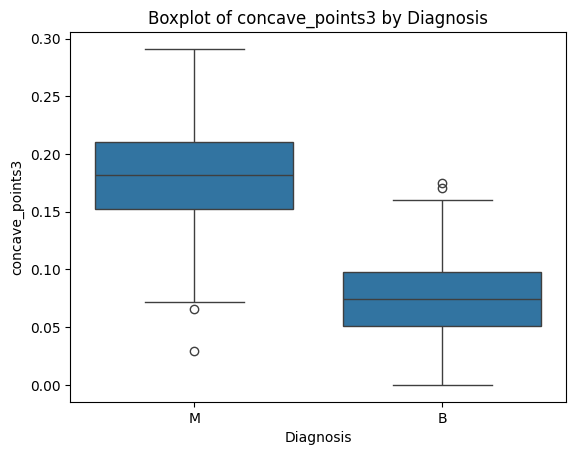

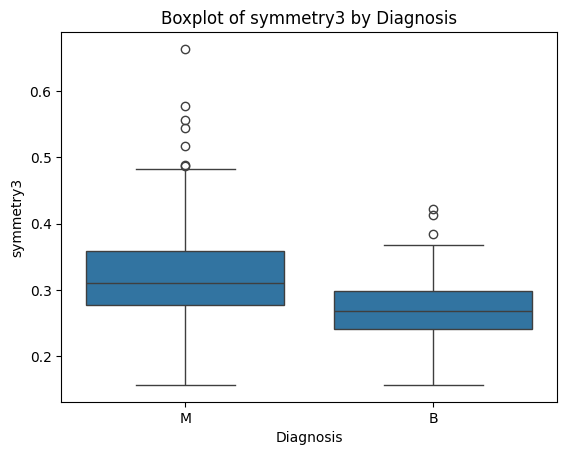

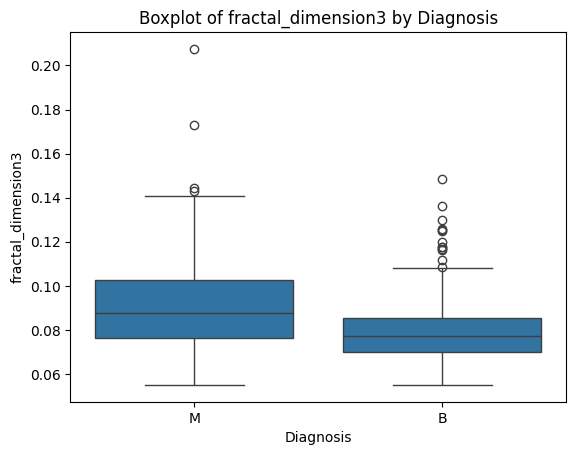

In [8]:
# Boxplots for numerical features
for col in num_features:
    sns.boxplot(x=target_col, y=col, data=training_df)
    plt.title(f'Boxplot of {col} by {target_col}')
    plt.show()

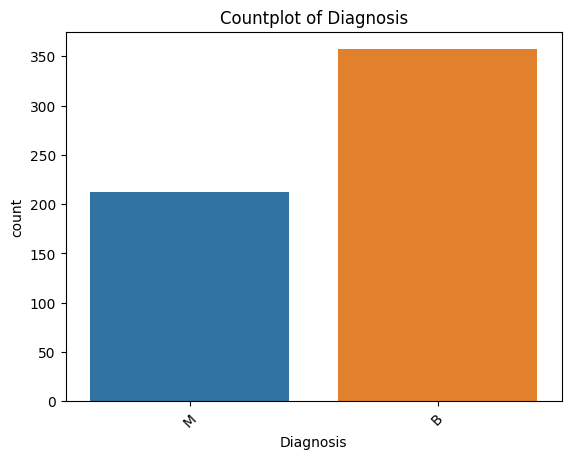

In [9]:
for col in cat_features:
    sns.countplot(x=col, hue=target_col, data=training_df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

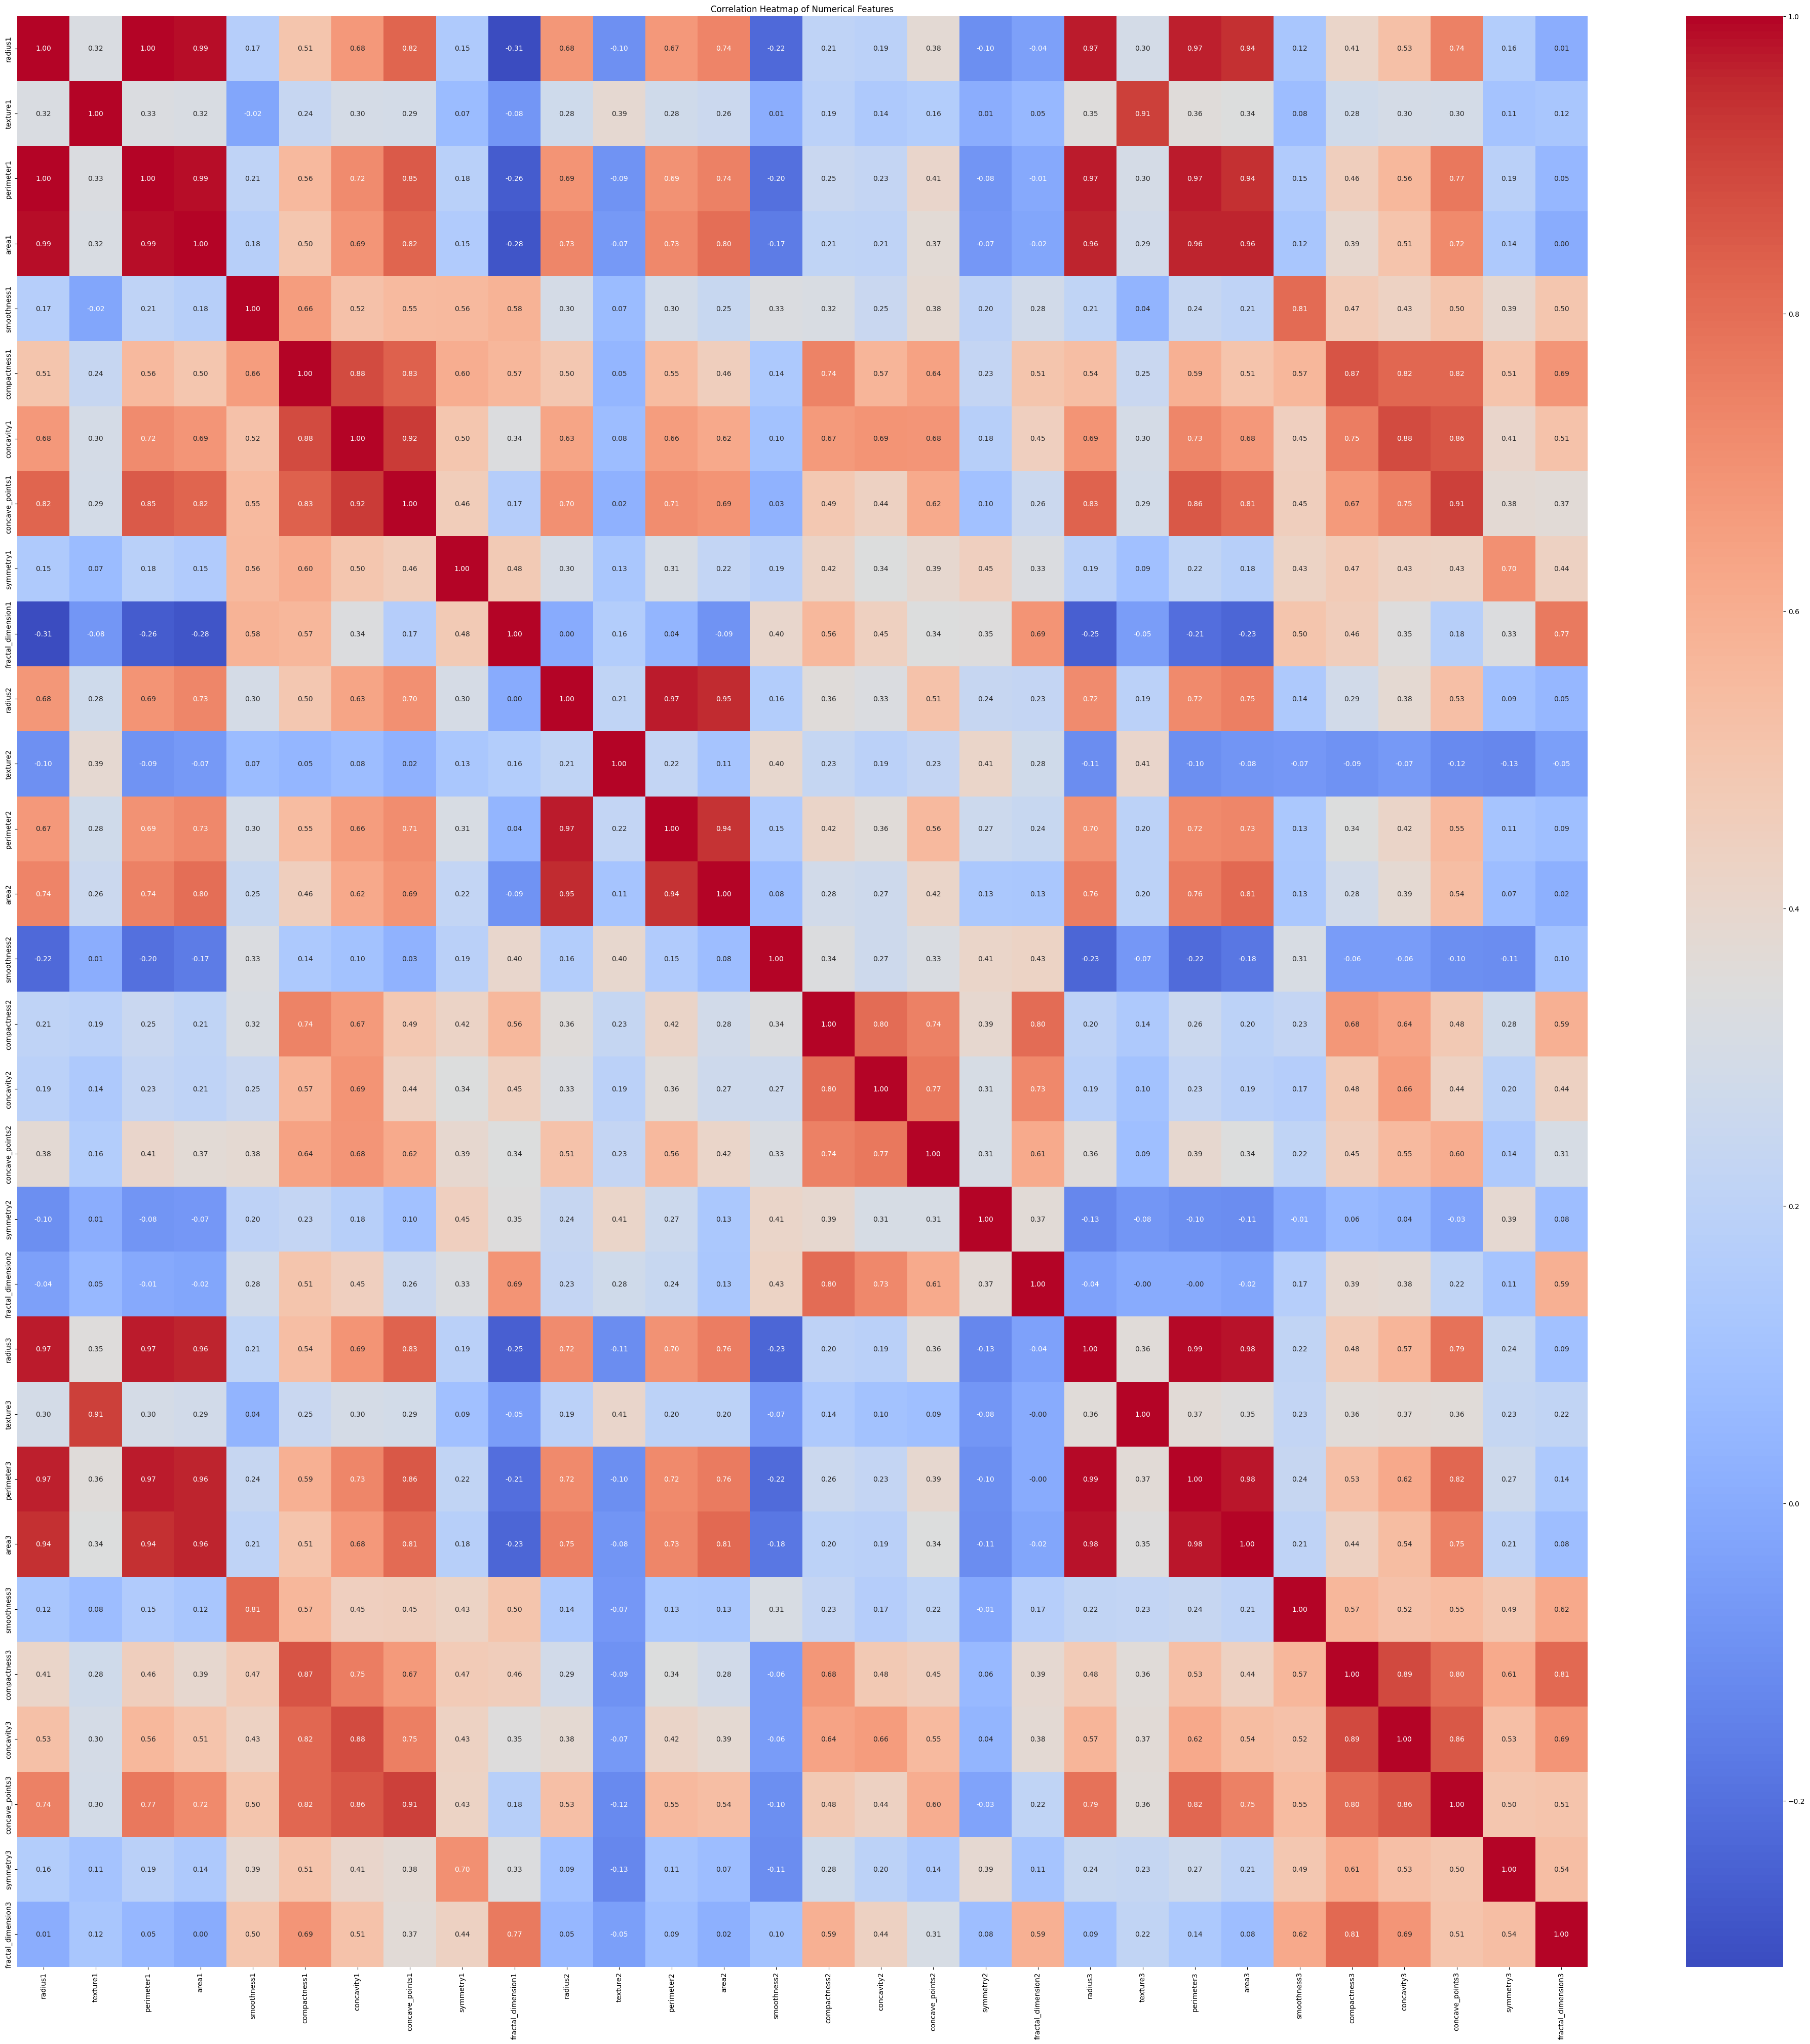

In [10]:
plt.figure(figsize=(50,50))
corr = training_df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Data Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder
# Handle missing values
for col in training_df.select_dtypes(include='object').columns:
    training_df[col].fillna(training_df[col].mode()[0], inplace=True)

for col in training_df.select_dtypes(include=np.number).columns:
    training_df[col].fillna(training_df[col].mean(), inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
for col in training_df.select_dtypes(include='object').columns:
    training_df[col] = label_enc.fit_transform(training_df[col])

/tmp/ipython-input-742444699.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_df[col].fillna(training_df[col].mode()[0], inplace=True)
/tmp/ipython-input-742444699.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [12]:
training_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [13]:
#Handle outliers
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

num_features = training_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features = [col for col in num_features if col != target_col]
for col in num_features:
  outliers= detect_outliers_iqr(training_df[col])
  training_df.loc[outliers, col] = training_df[col].median()



In [14]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

for col in training_df.drop(columns=[target_col]).columns:
    if features[col] == 1:
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()

    # Reshape the column data to 2D array
    training_df[col] = scaler.fit_transform(training_df[col].values.reshape(-1, 1))


# DATASET TRAINING SPLIT

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = training_df.drop(columns=target_col)
Y = training_df[target_col]
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

# Decision Tree

## Grid Search for hyper parameters

In [16]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, f1_score, make_scorer
)
from sklearn.tree import DecisionTreeClassifier as DTC

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(
    estimator=DTC(),
    param_grid=param_grid,
    cv=kfold,
    scoring=scoring,
    refit='f1',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)

fold_cols = [f'split{i}_test_accuracy' for i in range(kfold.n_splits)] \
          + [f'split{i}_test_f1' for i in range(kfold.n_splits)]

print(results_df[['params'] + fold_cols])


Fitting 5 folds for each of 135 candidates, totalling 675 fits
                                                params  split0_test_accuracy  \
0    {'criterion': 'gini', 'max_depth': None, 'min_...              0.945055   
1    {'criterion': 'gini', 'max_depth': None, 'min_...              0.956044   
2    {'criterion': 'gini', 'max_depth': None, 'min_...              0.956044   
3    {'criterion': 'gini', 'max_depth': None, 'min_...              0.945055   
4    {'criterion': 'gini', 'max_depth': None, 'min_...              0.945055   
..                                                 ...                   ...   
130  {'criterion': 'log_loss', 'max_depth': 10, 'mi...              0.934066   
131  {'criterion': 'log_loss', 'max_depth': 10, 'mi...              0.934066   
132  {'criterion': 'log_loss', 'max_depth': 10, 'mi...              0.923077   
133  {'criterion': 'log_loss', 'max_depth': 10, 'mi...              0.945055   
134  {'criterion': 'log_loss', 'max_depth': 10, 'mi...   

In [17]:
params_expanded = results_df["params"].apply(pd.Series)

# Merge with results_df
df = pd.concat([results_df.drop(columns=["params"]), params_expanded], axis=1)

print(df[(df["criterion"] == "gini") & (df["max_depth"] == 10)])
params_expanded = results_df["params"].apply(pd.Series)

# Merge with results_df
df = pd.concat([results_df.drop(columns=["params"]), params_expanded], axis=1)

# Filter for criterion='gini' and max_depth=10
df[(df["criterion"] == "log_loss") & (df["max_depth"] == None)]

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
36       0.022423      0.005830         0.010550        0.001029   
37       0.022158      0.003188         0.011697        0.003546   
38       0.019574      0.002422         0.010437        0.002303   
39       0.017195      0.001030         0.009294        0.000654   
40       0.016957      0.000886         0.008959        0.000507   
41       0.018598      0.002740         0.009880        0.001249   
42       0.017978      0.002280         0.010376        0.000458   
43       0.017872      0.000962         0.009846        0.000602   
44       0.018680      0.002216         0.010954        0.001797   

   param_criterion param_max_depth  param_min_samples_leaf  \
36            gini              10                       1   
37            gini              10                       1   
38            gini              10                       1   
39            gini              10                       2   
40       

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,split0_test_accuracy,split1_test_accuracy,...,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,criterion,max_depth,min_samples_leaf,min_samples_split


In [18]:
print("Best Parameters:", grid_search.best_params_)

# Best score from cross-validation
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.942362284820599


In [19]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.019827,0.002576,0.010118,0.000742,gini,None,1,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.945055,...,0.019160,26,0.945243,0.944867,0.945752,0.899089,0.911459,0.929282,0.019991,24
1,0.019305,0.001786,0.010009,0.001559,gini,None,1,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.956044,...,0.021308,62,0.956044,0.922814,0.924295,0.886076,0.911459,0.920138,0.022580,83
2,0.021614,0.001488,0.010082,0.000707,gini,None,1,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.956044,...,0.025631,93,0.956044,0.933594,0.924295,0.886076,0.888397,0.917681,0.026926,106
3,0.021280,0.004399,0.010561,0.001838,gini,None,2,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.945055,...,0.021308,131,0.944850,0.922814,0.891287,0.886076,0.899991,0.909004,0.021893,132
4,0.016883,0.001176,0.009093,0.000493,gini,None,2,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.945055,...,0.025441,126,0.945243,0.922215,0.934772,0.886076,0.879497,0.913561,0.026246,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.037979,0.003979,0.016735,0.004613,log_loss,10,2,5,"{'criterion': 'log_loss', 'max_depth': 10, 'mi...",0.934066,...,0.021308,62,0.934066,0.944439,0.934772,0.889324,0.899991,0.920519,0.021695,68
131,0.029862,0.008047,0.016093,0.004220,log_loss,10,2,10,"{'criterion': 'log_loss', 'max_depth': 10, 'mi...",0.934066,...,0.025441,62,0.934066,0.944439,0.945752,0.889324,0.888397,0.920396,0.026066,69
132,0.029179,0.016442,0.017556,0.007137,log_loss,10,4,2,"{'criterion': 'log_loss', 'max_depth': 10, 'mi...",0.923077,...,0.023466,36,0.922790,0.955730,0.945752,0.888397,0.911459,0.924825,0.024095,42
133,0.037125,0.003344,0.018900,0.004286,log_loss,10,4,5,"{'criterion': 'log_loss', 'max_depth': 10, 'mi...",0.945055,...,0.021308,22,0.944850,0.955730,0.945752,0.899991,0.911459,0.931556,0.021739,22


## MODEL TRAINING

In [20]:

model = DTC(**grid_search.best_params_)
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

## MODEL EVALUATION

In [21]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
import seaborn as sns

y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        66
           1       0.96      0.90      0.92        48

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



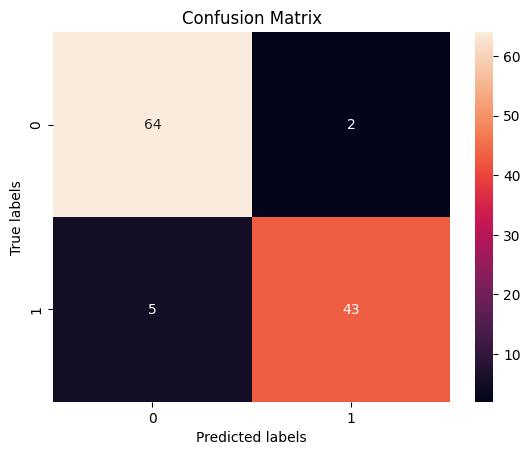

In [22]:

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

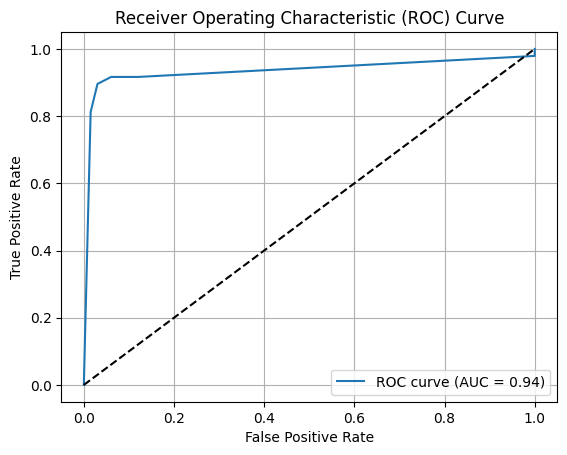

In [23]:
y_prob = model.predict_proba(x_test)[:, 1]  # probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ADABOOST

## Grid Search for hyper parameters

In [24]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report, make_scorer
)
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.tree import DecisionTreeClassifier as DTC
import pandas as pd
import numpy as np

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],               # Number of weak learners
    'learning_rate': [0.01, 0.1, 1],              # Step size
    'estimator__criterion': ['gini', 'entropy','log_loss']   # Split quality measure
}

# Stratified CV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')  # weighted for multiclass
}

# Grid Search
grid_search = GridSearchCV(
    estimator=ABC(estimator=DTC(max_depth=1)),
    param_grid=param_grid,
    cv=kfold,
    scoring=scoring,
    refit='f1',   # choose best model based on f1
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search.fit(x_train, y_train)

# Results DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Extract fold columns correctly
fold_cols = [col for col in results_df.columns if col.startswith("split")]
print(results_df[['params'] + fold_cols])


Fitting 5 folds for each of 27 candidates, totalling 135 fits
                                               params  split0_test_accuracy  \
0   {'estimator__criterion': 'gini', 'learning_rat...              0.934066   
1   {'estimator__criterion': 'gini', 'learning_rat...              0.934066   
2   {'estimator__criterion': 'gini', 'learning_rat...              0.945055   
3   {'estimator__criterion': 'gini', 'learning_rat...              0.956044   
4   {'estimator__criterion': 'gini', 'learning_rat...              0.978022   
5   {'estimator__criterion': 'gini', 'learning_rat...              0.978022   
6   {'estimator__criterion': 'gini', 'learning_rat...              0.978022   
7   {'estimator__criterion': 'gini', 'learning_rat...              0.967033   
8   {'estimator__criterion': 'gini', 'learning_rat...              0.967033   
9   {'estimator__criterion': 'entropy', 'learning_...              0.934066   
10  {'estimator__criterion': 'entropy', 'learning_...              0.

In [25]:
print("Best Parameters:", grid_search.best_params_)

# Best score from cross-validation
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'estimator__criterion': 'entropy', 'learning_rate': 1, 'n_estimators': 200}
Best CV Score: 0.9602173791490319


In [26]:
# Expand params dict into separate columns
params_expanded = results_df["params"].apply(pd.Series)

# Merge expanded params with main results_df
df = pd.concat([results_df.drop(columns=["params"]), params_expanded], axis=1)

# Select only what you want to display
fold_cols_acc = [col for col in df.columns if "split" in col and "accuracy" in col]
fold_cols_f1  = [col for col in df.columns if "split" in col and "f1" in col]

# Show rows grouped by n_estimators & learning_rate
for (n, lr), group in df.groupby(["n_estimators", "learning_rate"]):
    print(f"\n=== n_estimators={n}, learning_rate={lr} ===")
    print(group[["n_estimators", "learning_rate", "estimator__criterion"] + fold_cols_acc + fold_cols_f1])



=== n_estimators=50, learning_rate=0.01 ===
    n_estimators  learning_rate estimator__criterion  split0_test_accuracy  \
0             50           0.01                 gini              0.934066   
9             50           0.01              entropy              0.934066   
18            50           0.01             log_loss              0.934066   

    split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
0               0.967033              0.934066              0.879121   
9               0.967033              0.967033              0.879121   
18              0.967033              0.967033              0.879121   

    split4_test_accuracy  split0_test_f1  split1_test_f1  split2_test_f1  \
0               0.879121        0.932949        0.967136        0.933594   
9               0.879121        0.932949        0.967136        0.967136   
18              0.879121        0.932949        0.967136        0.967136   

    split3_test_f1  split4_test_f1  
0         0

## MODEL TRAINING

In [27]:

model = ABC(estimator=DTC(max_depth=1,criterion='gini'),n_estimators=200,learning_rate=0.1)
model.fit(x_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=200)

## MODEL EVALUATION

In [28]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
import seaborn as sns

y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.98      0.96      0.97        48

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



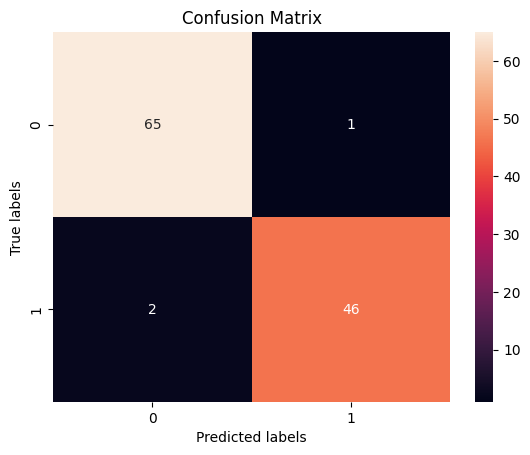

In [29]:

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

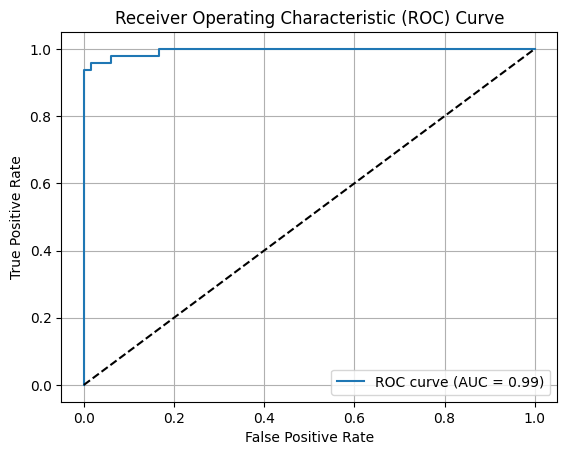

In [30]:
y_prob = model.predict_proba(x_test)[:, 1]  # probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Gradient Boosting

## Grid Search for hyper parameters

In [32]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report, make_scorer
)
from sklearn.ensemble import GradientBoostingClassifier as GBC
import pandas as pd
import numpy as np

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],      # Shrinks contribution of each tree
    'max_depth': [2, 3, 5],                 # Depth of each tree
    'subsample': [0.8, 1.0]                 # Fraction of samples for fitting
}

# Cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Multiple scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')  # weighted for multiclass
}

# Grid search
grid_search = GridSearchCV(
    estimator=GBC(),
    param_grid=param_grid,
    cv=kfold,
    scoring=scoring,
    refit='f1',     # Use best f1 for final model
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

# Results
results_df = pd.DataFrame(grid_search.cv_results_)

# Extract fold scores for both metrics
fold_cols = [col for col in results_df.columns if col.startswith('split') and 'test' in col]
print(results_df[['params'] + fold_cols])


Fitting 5 folds for each of 54 candidates, totalling 270 fits
                                               params  split0_test_accuracy  \
0   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...              0.945055   
1   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...              0.945055   
2   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...              0.945055   
3   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...              0.956044   
4   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...              0.978022   
5   {'learning_rate': 0.01, 'max_depth': 2, 'n_est...              0.967033   
6   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...              0.967033   
7   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...              0.967033   
8   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...              0.978022   
9   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...              0.978022   
10  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...              0.

In [33]:
print("Best Parameters:", grid_search.best_params_)

# Best score from cross-validation
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best CV Score: 0.9579363936196099


In [34]:
params_expanded = results_df["params"].apply(pd.Series)
df = pd.concat([results_df.drop(columns=["params"]), params_expanded], axis=1)

# Fold columns for accuracy & f1
fold_cols_acc = [col for col in df.columns if "split" in col and "accuracy" in col]
fold_cols_f1  = [col for col in df.columns if "split" in col and "f1" in col]

# Print grouped results
for (n, lr, depth), group in df.groupby(["n_estimators", "learning_rate", "max_depth"]):
    print(f"\n=== n_estimators={n}, learning_rate={lr}, max_depth={depth} ===")
    print(group[["n_estimators", "learning_rate", "max_depth"] + fold_cols_acc + fold_cols_f1])


=== n_estimators=100.0, learning_rate=0.01, max_depth=2.0 ===
   n_estimators  learning_rate  max_depth  split0_test_accuracy  \
0         100.0           0.01        2.0              0.945055   
1         100.0           0.01        2.0              0.945055   

   split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
0              0.989011              0.967033              0.912088   
1              0.967033              0.956044              0.934066   

   split4_test_accuracy  split0_test_f1  split1_test_f1  split2_test_f1  \
0               0.89011        0.944385        0.989045        0.967312   
1               0.89011        0.944850        0.966920        0.956305   

   split3_test_f1  split4_test_f1  
0        0.909854         0.89011  
1        0.933038         0.89011  

=== n_estimators=100.0, learning_rate=0.01, max_depth=3.0 ===
   n_estimators  learning_rate  max_depth  split0_test_accuracy  \
6         100.0           0.01        3.0              0.

## MODEL TRAINING

In [35]:

model = GBC(**grid_search.best_params_)
model.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200,
                           subsample=0.8)

## MODEL EVALUATION

In [36]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
import seaborn as sns

y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.94      0.96      0.95        48

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



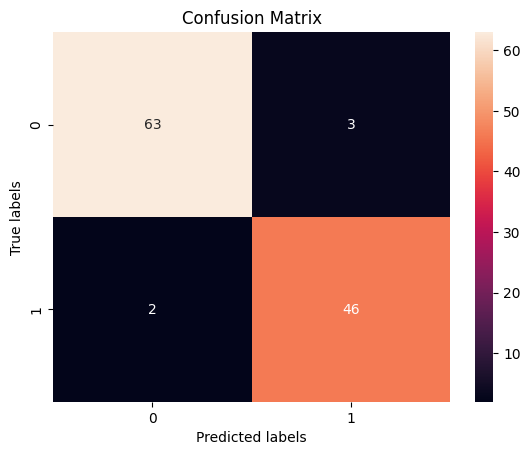

In [37]:

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

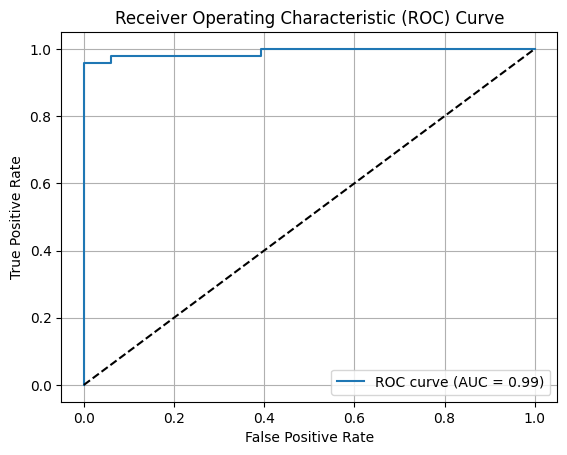

In [38]:
y_prob = model.predict_proba(x_test)[:, 1]  # probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# XGBoost

## Grid Search for hyper parameters

In [40]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report, make_scorer
)
from xgboost import XGBClassifier as XGB
import numpy as np
import pandas as pd

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction for split
}

# CV strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Multiple metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')
}

# Grid search with refit on f1
grid_search = GridSearchCV(
    estimator=XGB(use_label_encoder=False, eval_metric="mlogloss"),
    param_grid=param_grid,
    cv=kfold,
    scoring=scoring,
    refit='f1',   # Must specify one metric to optimize
    verbose=1,
    n_jobs=-1
)

# Train
grid_search.fit(x_train, y_train)

# Extract all fold scores
results_df = pd.DataFrame(grid_search.cv_results_)

# Collect split columns (for both metrics)
fold_cols = [col for col in results_df.columns if col.startswith("split")]

# Show parameters + fold scores
print(results_df[['params'] + fold_cols])


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
                                                params  split0_test_accuracy  \
0    {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...              0.989011   
1    {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...              0.989011   
2    {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...              0.989011   
3    {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...              0.989011   
4    {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...              0.989011   
..                                                 ...                   ...   
211  {'colsample_bytree': 1.0, 'gamma': 0.2, 'learn...              0.989011   
212  {'colsample_bytree': 1.0, 'gamma': 0.2, 'learn...              0.989011   
213  {'colsample_bytree': 1.0, 'gamma': 0.2, 'learn...              0.978022   
214  {'colsample_bytree': 1.0, 'gamma': 0.2, 'learn...              0.989011   
215  {'colsample_bytree': 1.0, 'gamma': 0.2, 'learn...  

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:24:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [41]:
print("Best Parameters:", grid_search.best_params_)

# Best score from cross-validation
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV Score: 0.964562400345422


In [42]:
params_expanded = results_df["params"].apply(pd.Series)
df = pd.concat([results_df.drop(columns=["params"]), params_expanded], axis=1)

# Fold columns for accuracy & f1
fold_cols_acc = [col for col in df.columns if "split" in col and "accuracy" in col]
fold_cols_f1  = [col for col in df.columns if "split" in col and "f1" in col]

# Print grouped results
for (n, lr, depth, gamma), group in df.groupby(["n_estimators", "learning_rate", "max_depth","gamma"]):
    print(f"\n=== n_estimators={n}, learning_rate={lr}, max_depth={depth}, gamma={gamma} ===")
    print(group[["n_estimators", "learning_rate", "max_depth", "gamma"] + fold_cols_acc + fold_cols_f1])


=== n_estimators=100.0, learning_rate=0.01, max_depth=3.0, gamma=0.0 ===
     n_estimators  learning_rate  max_depth  gamma  split0_test_accuracy  \
0           100.0           0.01        3.0    0.0              0.989011   
1           100.0           0.01        3.0    0.0              0.989011   
108         100.0           0.01        3.0    0.0              0.978022   
109         100.0           0.01        3.0    0.0              0.967033   

     split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
0                0.967033              0.989011              0.934066   
1                0.956044              0.978022              0.934066   
108              0.956044              0.989011              0.934066   
109              0.956044              0.978022              0.923077   

     split4_test_accuracy  split0_test_f1  split1_test_f1  split2_test_f1  \
0                0.890110        0.989049         0.96692        0.989045   
1                0.901099

## MODEL TRAINING

In [43]:

model = XGB(**grid_search.best_params_)
model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

## MODEL EVALUATION

In [44]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
import seaborn as sns

y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.94      0.98      0.96        48

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



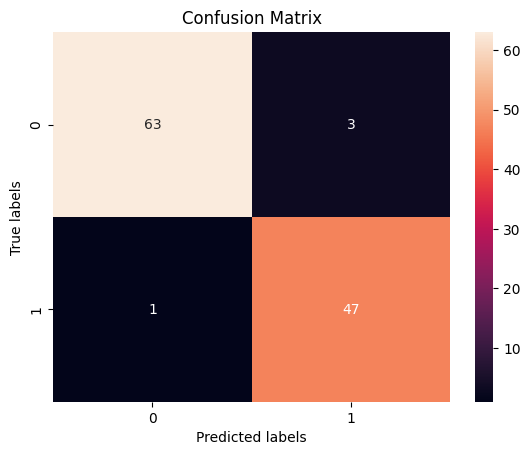

In [45]:

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

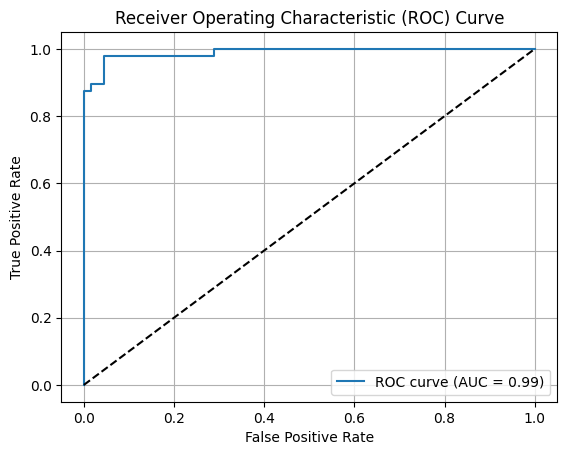

In [46]:
y_prob = model.predict_proba(x_test)[:, 1]  # probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# RandomForest

## Grid Search for hyper parameters

In [47]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report, make_scorer
)
import pandas as pd
import numpy as np

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [None, 5, 10, 20],         # Depth of each tree
    'criterion': ['gini', 'entropy', 'log_loss']  # Split quality measure
}

# Stratified K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Multiple metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')  # weighted for multiclass
}

# GridSearch with Random Forest
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=kfold,
    scoring=scoring,
    refit='f1',   # refit using best f1
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

# Extract all fold scores into DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display only parameters + fold scores (for each metric)
fold_cols = [col for col in results_df.columns if col.startswith("split")]
print(results_df[['params'] + fold_cols])


Fitting 5 folds for each of 36 candidates, totalling 180 fits
                                               params  split0_test_accuracy  \
0   {'criterion': 'gini', 'max_depth': None, 'n_es...              0.989011   
1   {'criterion': 'gini', 'max_depth': None, 'n_es...              0.989011   
2   {'criterion': 'gini', 'max_depth': None, 'n_es...              0.989011   
3   {'criterion': 'gini', 'max_depth': 5, 'n_estim...              0.989011   
4   {'criterion': 'gini', 'max_depth': 5, 'n_estim...              0.989011   
5   {'criterion': 'gini', 'max_depth': 5, 'n_estim...              0.989011   
6   {'criterion': 'gini', 'max_depth': 10, 'n_esti...              0.989011   
7   {'criterion': 'gini', 'max_depth': 10, 'n_esti...              0.989011   
8   {'criterion': 'gini', 'max_depth': 10, 'n_esti...              0.989011   
9   {'criterion': 'gini', 'max_depth': 20, 'n_esti...              0.989011   
10  {'criterion': 'gini', 'max_depth': 20, 'n_esti...              0.

In [48]:
print("Best Parameters:", grid_search.best_params_)

# Best score from cross-validation
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 300}
Best CV Score: 0.9535839839128641


In [50]:
params_expanded = results_df["params"].apply(pd.Series)
df = pd.concat([results_df.drop(columns=["params"]), params_expanded], axis=1)

# Fold columns for accuracy & f1
fold_cols_acc = [col for col in df.columns if "split" in col and "accuracy" in col]
fold_cols_f1  = [col for col in df.columns if "split" in col and "f1" in col]

# Print grouped results
for (n, md, cri), group in df.groupby(["n_estimators", "max_depth", 'criterion']):
    print(f"\n=== n_estimators={n}, max_depth={md}, criterion={cri} ===")
    print(group[["n_estimators", "max_depth", 'criterion'] + fold_cols_acc + fold_cols_f1])


=== n_estimators=100, max_depth=5.0, criterion=entropy ===
    n_estimators  max_depth criterion  split0_test_accuracy  \
15           100        5.0   entropy              0.989011   

    split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
15              0.967033              0.978022              0.923077   

    split4_test_accuracy  split0_test_f1  split1_test_f1  split2_test_f1  \
15              0.901099        0.989049         0.96692        0.978152   

    split3_test_f1  split4_test_f1  
15        0.922215        0.900761  

=== n_estimators=100, max_depth=5.0, criterion=gini ===
   n_estimators  max_depth criterion  split0_test_accuracy  \
3           100        5.0      gini              0.989011   

   split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
3              0.967033              0.956044              0.923077   

   split4_test_accuracy  split0_test_f1  split1_test_f1  split2_test_f1  \
3              0.901099        0.989049  

## MODEL TRAINING

In [51]:

model = RandomForestClassifier(**grid_search.best_params_)
model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=300)

## MODEL EVALUATION

In [52]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
import seaborn as sns

y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.96      0.92      0.94        48

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



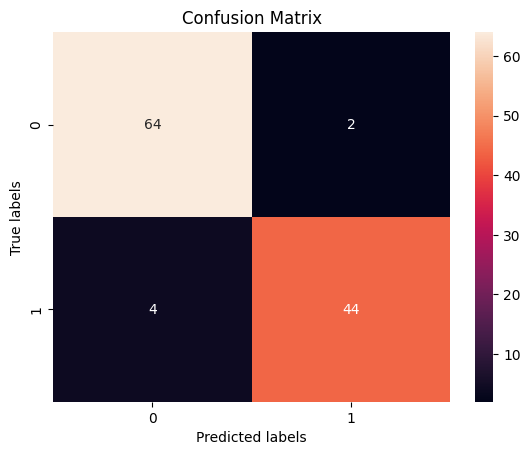

In [53]:

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

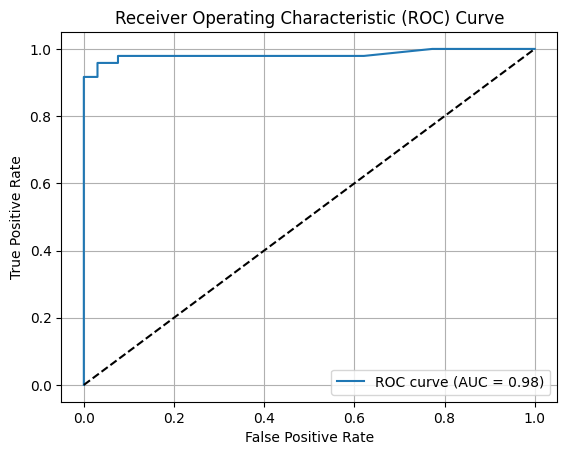

In [54]:
y_prob = model.predict_proba(x_test)[:, 1]  # probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Stacked Ensemble

## Grid Search for hyper parameters

In [55]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd

# Define base models
base_setups = {
    "SVM_NB_DT": [
        ('svm', SVC(probability=True, random_state=42)),
        ('nb', GaussianNB()),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    "SVM_NB_DT_RF": [
        ('svm', SVC(probability=True, random_state=42)),
        ('nb', GaussianNB()),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    "SVM_DT_KNN": [
        ('svm', SVC(probability=True, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('knn', KNeighborsClassifier())
    ]
}

# Final estimator options
final_estimators = {
    "LogReg": LogisticRegression(max_iter=1000, random_state=42),
    "RF": RandomForestClassifier(random_state=42)
}

# Stratified K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

# Loop through base models + final estimators
for setup_name, base_models in base_setups.items():
    for final_name, final_estimator in final_estimators.items():

        stack_model = StackingClassifier(
            estimators=base_models,
            final_estimator=final_estimator,
            cv=kfold,
            n_jobs=-1
        )

        stack_model.fit(x_train, y_train)
        y_pred = stack_model.predict(x_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")

        results.append({
            "Base Models": setup_name,
            "Final Estimator": final_name,
            "Accuracy": acc,
            "F1 Score": f1
        })

# Convert results to DataFrame (similar to your LaTeX table)
results_df = pd.DataFrame(results)
print(results_df)


    Base Models Final Estimator  Accuracy  F1 Score
0     SVM_NB_DT          LogReg  0.982456  0.982456
1     SVM_NB_DT              RF  0.964912  0.964912
2  SVM_NB_DT_RF          LogReg  0.982456  0.982456
3  SVM_NB_DT_RF              RF  0.964912  0.964912
4    SVM_DT_KNN          LogReg  0.982456  0.982456
5    SVM_DT_KNN              RF  0.938596  0.938813


In [56]:
print("Best Parameters:", grid_search.best_params_)

# Best score from cross-validation
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 300}
Best CV Score: 0.9535839839128641


In [57]:
results_df

,Base Models,Final Estimator,Accuracy,F1 Score
0,SVM_NB_DT,LogReg,0.982456,0.982456
1,SVM_NB_DT,RF,0.964912,0.964912
2,SVM_NB_DT_RF,LogReg,0.982456,0.982456
3,SVM_NB_DT_RF,RF,0.964912,0.964912
4,SVM_DT_KNN,LogReg,0.982456,0.982456
5,SVM_DT_KNN,RF,0.938596,0.938813


## MODEL TRAINING

In [58]:
base = [
        ('svm', SVC(probability=True, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('knn', KNeighborsClassifier())
    ]
final = LogisticRegression(max_iter=1000, random_state=42)
model = best_stack_model = StackingClassifier(
    estimators=base,
    final_estimator=final,
    cv=5,
    n_jobs=-1
)
model.fit(x_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('svm', SVC(probability=True, random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1)

## MODEL EVALUATION

In [59]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
import seaborn as sns

y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        66
           1       0.98      0.98      0.98        48

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



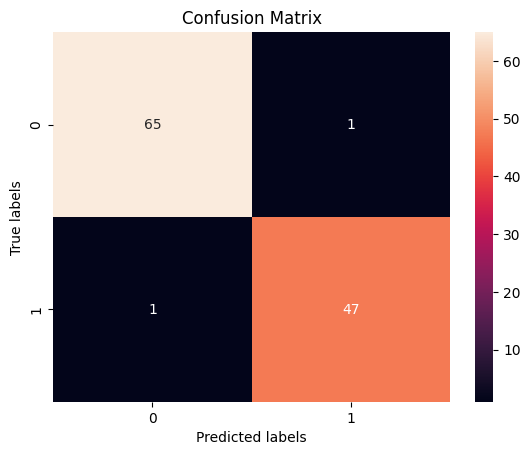

In [60]:

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

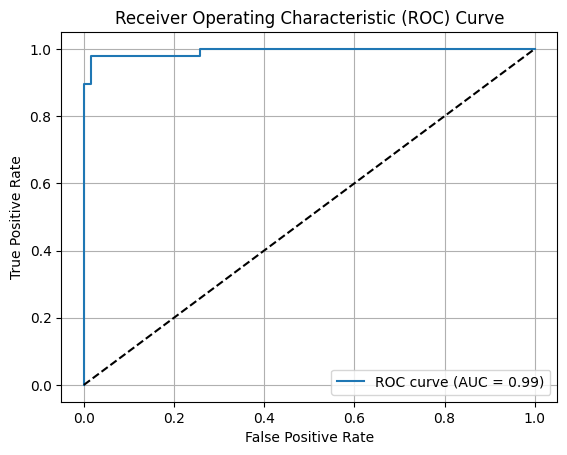

In [61]:
y_prob = model.predict_proba(x_test)[:, 1]  # probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
